In [1]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredOffsetbox, VPacker, HPacker, TextArea, DrawingArea
from matplotlib.patches import Rectangle
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
import numpy as np

%matplotlib inline

Methods to create dummy legends

In [2]:
# Helper class for t
class ColoredDrawingArea(DrawingArea):
    """
    A Drawing Area with a background color
    """
    def __init__(self, width, height, xdescent=0.0, ydescent=0.0,
                 clip=True, color='none'):

        super(ColoredDrawingArea, self).__init__(
            width, height, xdescent, ydescent, clip=clip)

        self.patch = Rectangle((0, 0), width=width,
                               height=height,
                               facecolor=color,
                               edgecolor='None',
                               linewidth=0,
                               antialiased=False)
        self.add_artist(self.patch)


def make_a_legend(name, num_entries):
    """
    Create a single legend (as a packed offsetbox)
    """
    r = lambda: np.random.randint(0, 256)
    colors = ['#{:02X}{:02X}{:02X}'.format(r(),r(),r()) for i in range(num_entries)]
    title = TextArea(name, {'fontweight': 'bold'})
    entries = [title]
    
    for color in colors:
        e = HPacker(children=[ColoredDrawingArea(20, 20, color=color), TextArea(color)],
                    align='center', sep=2, pad=0)
        entries.append(e)

    return VPacker(children=entries, sep=5, pad=0)


def make_legends(n=1, stack='h', min=1, max=5):
    """
    Create one or more legends (as a packed offset box)
    """
    r = lambda: np.random.randint(min, max+1)
    legend_boxes = [make_a_legend('Legend {}'.format(i), r()) for i in range(n)]

    if stack == 'h':
        packer = HPacker
        align = 'bottom'
    else:
        packer = VPacker
        align = 'left'
    combined_legend_box = packer(children=legend_boxes, align=align, sep=10, pad=0)
    return combined_legend_box

### A single plot with an AnchoredOffsetbox ###

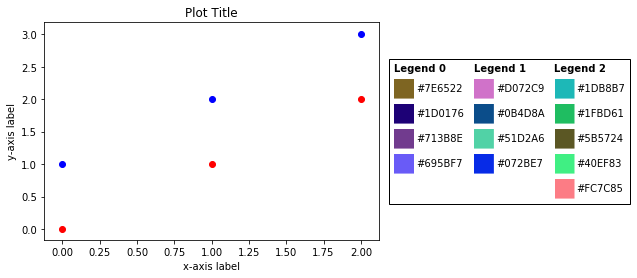

In [3]:
np.random.seed(12345)

fig, ax = plt.subplots(1, 1)

# create legends
legends_box = make_legends(3, 'h', 2, 5)

# Wrap legends in an AnchoredOffsetbox
anchored_box = AnchoredOffsetbox(
    loc='center left',
    child=legends_box,
    pad=0.5,
    frameon=True,
    bbox_to_anchor=(1, .5),
    bbox_transform=ax.transAxes,
    borderpad=1)


x = np.arange(3)
y = np.arange(3)

red_dots = ax.scatter(x, y, c='red', label='red dots')
blue_dots = ax.scatter(x, y+1, c='blue', label='blue dots')
ax.set_title('Plot Title')
ax.set_xlabel('x-axis label')
ax.set_ylabel('y-axis label')
ax.add_artist(anchored_box)

For most use cases when the legend is on the right there aren't that many issues to deal with,
`tight_layout` can handle all of them. The limitations are:

1. A legend on the left side of the y-axis label would involve manipulating
   position parameters to prevent overlap.
2. A legend below the x-axis label would also involve manipulating
   position parameters to prevent overlap. Plus, it is even harder to automatically place plot
   caption.
3. A legend between the plot title and the plot area would also involve manipulating
   position paramaters for the the title, as one would have to directly use `figure.text`.

### A subplots with separate AnchoredOffsetboxes ###

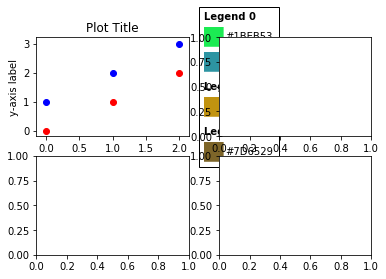

In [4]:
np.random.seed(23456)

fig, axs = plt.subplots(2, 2)

ax1, ax2, ax3, ax4 = axs.ravel()

# create legends
legends_box = make_legends(3, 'v', 1, 2)

# Wrap legends in an AnchoredOffsetbox
anchored_box = AnchoredOffsetbox(
    loc='center left',
    child=legends_box,
    pad=0.5,
    frameon=True,
    bbox_to_anchor=(1, .5),
    bbox_transform=ax1.transAxes,
    borderpad=1)

x = np.arange(3)
y = np.arange(3)

red_dots = ax1.scatter(x, y, c='red', label='red dots')
blue_dots = ax1.scatter(x, y+1, c='blue', label='blue dots')
ax1.set_title('Plot Title')
ax1.set_xlabel('x-axis label')
ax1.set_ylabel('y-axis label')
ax1.add_artist(anchored_box)

### A subplots with an AnchoredOffsetbox ###

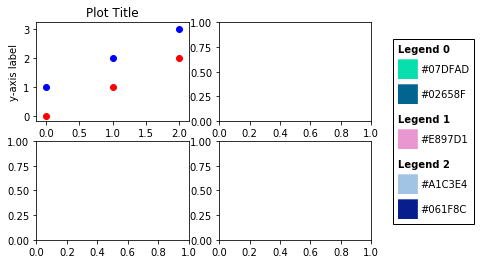

In [5]:
np.random.seed(3456)

fig, axs = plt.subplots(2, 2)

ax1, ax2, ax3, ax4 = axs.ravel()

# create legends
legends_box = make_legends(3, 'v', 1, 2)

# Wrap legends in an AnchoredOffsetbox
anchored_box = AnchoredOffsetbox(
    loc='center left',
    child=legends_box,
    pad=0.5,
    frameon=True,
    bbox_to_anchor=(.95, .5),         # <-- finicky
    bbox_transform=fig.transFigure,   # <--- different
    borderpad=0)

x = np.arange(3)
y = np.arange(3)

red_dots = ax1.scatter(x, y, c='red', label='red dots')
blue_dots = ax1.scatter(x, y+1, c='blue', label='blue dots')
ax1.set_title('Plot Title')
ax1.set_xlabel('x-axis label')
ax1.set_ylabel('y-axis label')
ax1.add_artist(anchored_box)

The `subplot_params` complicate this case since anchoring the box to the figure means considering the `right` value of the `subplot_params` and the right most tick labels.